In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [2]:
df = pd.read_csv('/Users/ankitanand/Documents/Study/Project/MachineLearning/BinaryClassificationOfMachineFailures/playground-series-s3e17_dataset/train.csv')

In [3]:
df.head(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


In [4]:
corr = df.corr(numeric_only=True)

<Axes: >

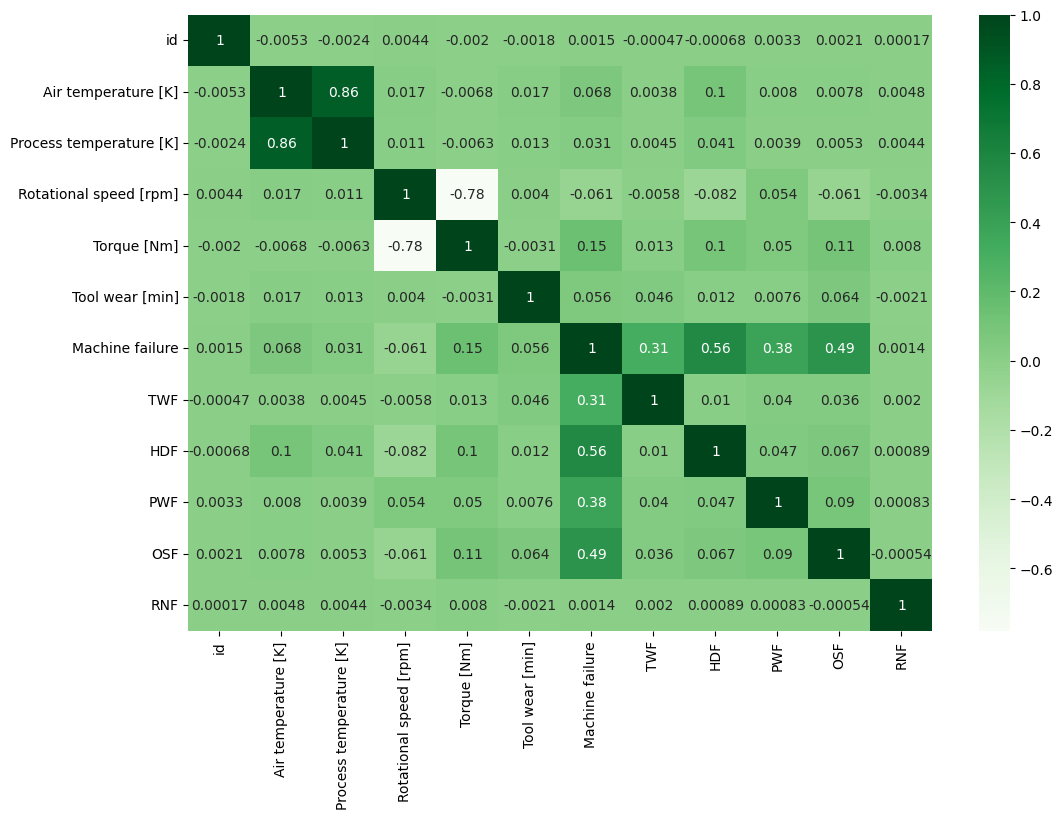

In [5]:
plt.figure(figsize=(12,8))
sb.heatmap(corr, cmap='Greens', annot=True)

In [6]:
print("Output type : ",df['Machine failure'].unique())
print("Total number of rows :", df['Machine failure'].count())

Output type :  [0 1]
Total number of rows : 136429


In [7]:
print("Output type : ",df['TWF'].unique())
print("Total number of rows :", df['TWF'].count())

Output type :  [0 1]
Total number of rows : 136429


In [8]:
print("Output type : ",df['HDF'].unique())
print("Total number of rows :", df['HDF'].count())

Output type :  [0 1]
Total number of rows : 136429


In [9]:
print("Output type : ",df['PWF'].unique())
print("Total number of rows :", df['PWF'].count())

Output type :  [0 1]
Total number of rows : 136429


In [10]:
print("Output type : ",df['OSF'].unique())
print("Total number of rows :", df['OSF'].count())

Output type :  [0 1]
Total number of rows : 136429


In [11]:
print("Output type : ",df['Process temperature [K]'].unique())
print("Total number of rows :", df['Process temperature [K]'].count())

Output type :  [309.6 312.1 308.5 310.9 309.  308.9 311.  310.1 308.8 312.3 310.8 310.7
 308.4 309.4 308.3 309.9 309.8 311.7 312.4 310.4 307.9 312.2 308.2 309.5
 309.3 308.1 311.9 308.  310.6 309.1 307.5 312.  308.6 310.2 311.2 311.6
 310.5 309.7 311.1 311.4 313.1 312.7 308.7 311.3 311.8 310.3 310.  311.5
 312.8 313.2 307.7 307.8 306.  313.  313.4 309.2 306.8 306.1 307.2 312.5
 312.9 306.4 306.9 307.4 307.6 307.1 306.5 313.3 306.2 307.3 312.6 313.5
 306.6 313.6 306.3 305.8 305.9 307.  306.7 313.8 313.7]
Total number of rows : 136429


In [12]:
print("Output type : ",df['Air temperature [K]'].unique())
print("Total number of rows :", df['Air temperature [K]'].count())

Output type :  [300.6   302.6   299.3   301.    298.    298.4   299.6   298.7   297.7
 300.5   301.5   301.4   297.1   298.5   297.6   300.4   303.5   298.6
 300.9   297.2   298.3   297.4   301.3   300.2   300.1   297.8   300.7
 300.8   299.2   299.7   302.5   301.8   296.7   302.4   298.1   301.9
 299.1   299.    299.8   298.9   297.3   297.9   298.8   300.    302.3
 297.5   303.9   301.7   303.7   301.2   303.3   303.6   300.3   302.1
 299.5   299.4   302.2   297.    298.2   304.    303.1   296.9   301.1
 295.5   302.    304.2   303.4   296.1   302.9   301.6   304.1   303.
 295.6   302.7   296.8   296.2   303.8   299.9   295.7   303.2   296.3
 295.9   295.8   302.8   296.6   296.5   296.4   304.3   296.    295.4
 304.4   295.3   300.98  297.095 303.96 ]
Total number of rows : 136429


In [13]:
def plotBarGraph(res, column_name, start=0, top=10, show=False, rotate=False, xticks=None):
    plt.figure(figsize=(15, 6))
    plt.bar(res[column_name][start:top], res['count'][start:top])
    plt.xlabel(column_name, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.title(f'{column_name} Frequency', fontsize=16)

    for i, value in enumerate(res['count'][start:top]):
        plt.text(res[column_name][start + i], value + 0.5, str(value), ha='center', fontsize=16)
        
    plt.xticks(xticks, fontsize=13)
    plt.yticks(fontsize=13)

    plt.show()

In [14]:
def plotPieChart(res, column_name, start=0, top=10, show=False, ax=None, fig=None):
    labels = res[column_name][start:top]
    values = res['count'][start:top]
    
    if ax:
        ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
        ax.set_title(f'{column_name} Frequency', fontsize=16)
    else:
        if not fig:
            plt.figure(figsize=(8, 15))
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

        plt.title(f'{column_name} Frequency', fontsize=16)

        if show:
            plt.savefig(f'{column_name}_freq_pie_chart.png')
            plt.show()
        else:
            plt.show()

In [15]:
plotBarGraph(df['Machine failure'].value_counts().reset_index().rename(columns = {'index' : 'Machine failure', 'Machine failure' : 'count'}),column_name='Machine failure', xticks=[0,1])

KeyError: 'Machine failure'

<Figure size 1500x600 with 0 Axes>

In [ ]:
_, ax = plt.subplots(3,2, figsize=(15,10))
plotPieChart(df['TWF'].value_counts().reset_index().rename(columns = {'index': 'TWF', 'TWF': 'count'}),column_name='TWF', ax=ax[0,0])
plotPieChart(df['HDF'].value_counts().reset_index().rename(columns = {'index': 'HDF', 'HDF': 'count'}),column_name='HDF', ax=ax[0,1])
plotPieChart(df['PWF'].value_counts().reset_index().rename(columns = {'index': 'PWF', 'PWF': 'count'}),column_name='PWF', ax=ax[1,0])
plotPieChart(df['OSF'].value_counts().reset_index().rename(columns = {'index': 'OSF', 'OSF': 'count'}),column_name='OSF', ax=ax[1,1])
plotPieChart(df['RNF'].value_counts().reset_index().rename(columns = {'index': 'RNF', 'RNF': 'count'}),column_name='RNF', ax=ax[2,0])
plotPieChart(df['Type'].value_counts().reset_index().rename(columns = {'index': 'Type', 'Type': 'count'}),column_name='Type', ax=ax[2,1])